In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

# Load the data
data=pd.read_csv("Cleaned_Bank_Data.csv")

# Check for missing values
print(data.isnull().sum())  

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64


In [256]:
# Convert categorical variables to numerical 
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'y']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)  

In [257]:
# Standardize the data 
scaler = StandardScaler()
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [258]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [259]:
# Principal Component Analysis with added components
pca = PCA(n_components=5)  # Increase the number of components 
principal_components = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['y_yes'] = y_train

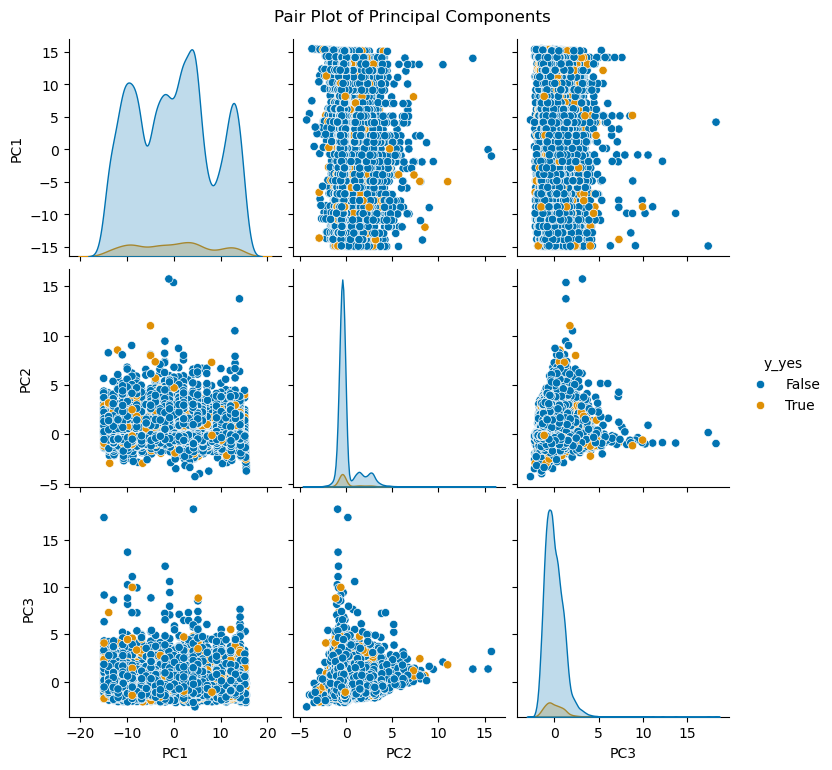

In [260]:
# Visualize for multiple components
sns.pairplot(pca_df, hue='y_yes', palette='colorblind', vars=['PC1', 'PC2', 'PC3'], diag_kind='kde')
plt.suptitle('Pair Plot of Principal Components', y=1.02)
plt.show()

In [261]:
# Analyze Feature Importance 
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=X.columns)
print(loadings)  # Print the loadings

                          PC1       PC2       PC3       PC4       PC5
age                 -0.001263 -0.139024  0.784159 -0.119011 -0.469853
balance              0.000324 -0.001441  0.522486  0.153288  0.819176
day                  0.999587  0.017325  0.003397  0.011623 -0.003850
duration            -0.003741  0.041501  0.038346  0.774501 -0.212665
campaign             0.020518 -0.227966 -0.050383 -0.562790  0.072485
pdays               -0.011922  0.785654  0.091419 -0.149323 -0.048210
previous            -0.005695  0.537358  0.101119 -0.127440 -0.025459
job_blue-collar     -0.001266  0.005686 -0.025082 -0.004890 -0.028224
job_entrepreneur    -0.000109 -0.002305  0.004638 -0.000513 -0.001060
job_housemaid        0.000113 -0.006712  0.011519 -0.001811 -0.008524
job_management       0.000936 -0.000730  0.019293  0.000812  0.060824
job_retired         -0.000210 -0.011276  0.078857 -0.002739 -0.046630
job_self-employed    0.000081 -0.002167  0.001126  0.000782  0.004280
job_services        

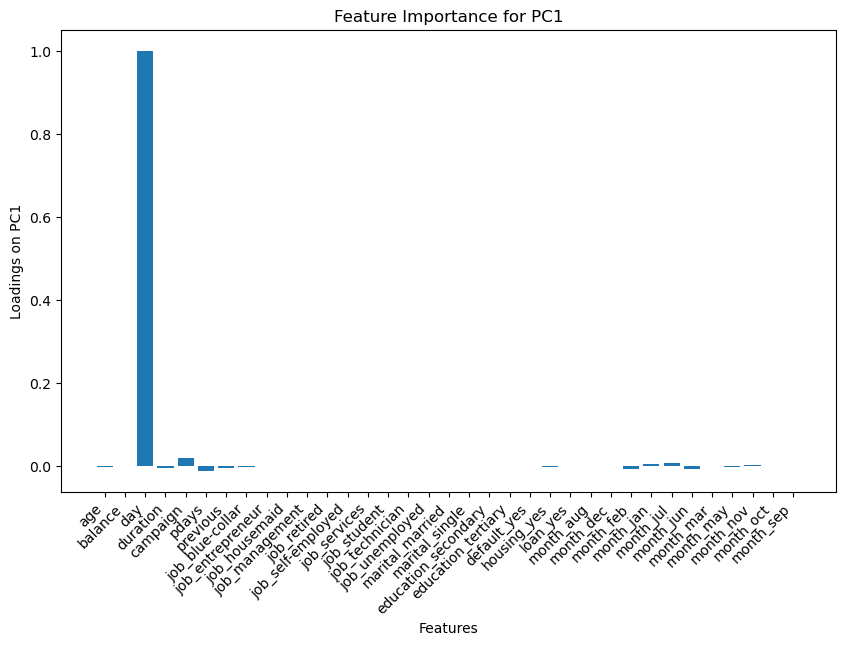

In [262]:
# Visualize feature importance for PC1
plt.figure(figsize=(10, 6))
plt.bar(loadings.index, loadings['PC1'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Loadings on PC1')
plt.title('Feature Importance for PC1')
plt.show()

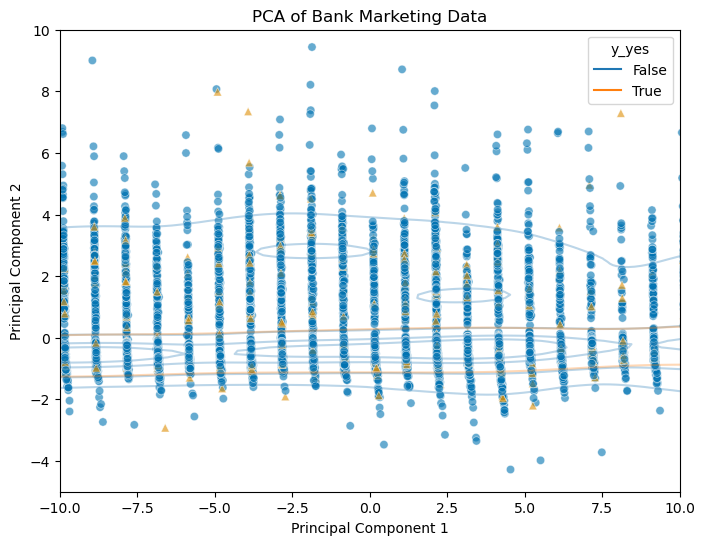

In [263]:
# Visualize all PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='y_yes', data=pca_df,
                palette='colorblind', style='y_yes', markers=['o', '^'], alpha=0.6)
sns.kdeplot(x='PC1', y='PC2', hue='y_yes', data=pca_df, levels=5, alpha=0.3)
plt.xlim(-10, 10)
plt.ylim(-5, 10)
plt.title('PCA of Bank Marketing Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

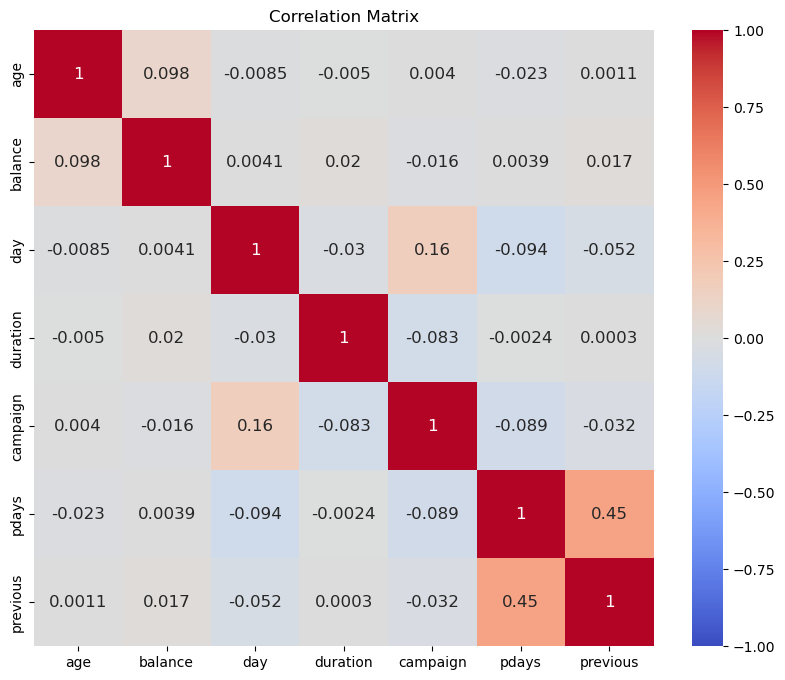

In [264]:
# Create a heatmap
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"fontsize": 12})
plt.title("Correlation Matrix")
plt.show()

In [265]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [266]:
# Print results
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Results:
Accuracy: 0.8954740131959718
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      7658
        True       0.59      0.27      0.37       981

    accuracy                           0.90      8639
   macro avg       0.75      0.62      0.66      8639
weighted avg       0.88      0.90      0.88      8639

[[7468  190]
 [ 713  268]]


In [267]:
# Create and train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [268]:
# Make predictions on the test data
y_pred = logreg.predict(X_test)

In [269]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8954740131959718
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      7658
        True       0.59      0.27      0.37       981

    accuracy                           0.90      8639
   macro avg       0.75      0.62      0.66      8639
weighted avg       0.88      0.90      0.88      8639



In [270]:
# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [271]:
# Print Decsion Tree ouput
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))


Decision Tree Results:
Accuracy: 0.8732492186595671
              precision    recall  f1-score   support

       False       0.93      0.93      0.93      7658
        True       0.44      0.46      0.45       981

    accuracy                           0.87      8639
   macro avg       0.69      0.69      0.69      8639
weighted avg       0.88      0.87      0.87      8639

[[7089  569]
 [ 526  455]]


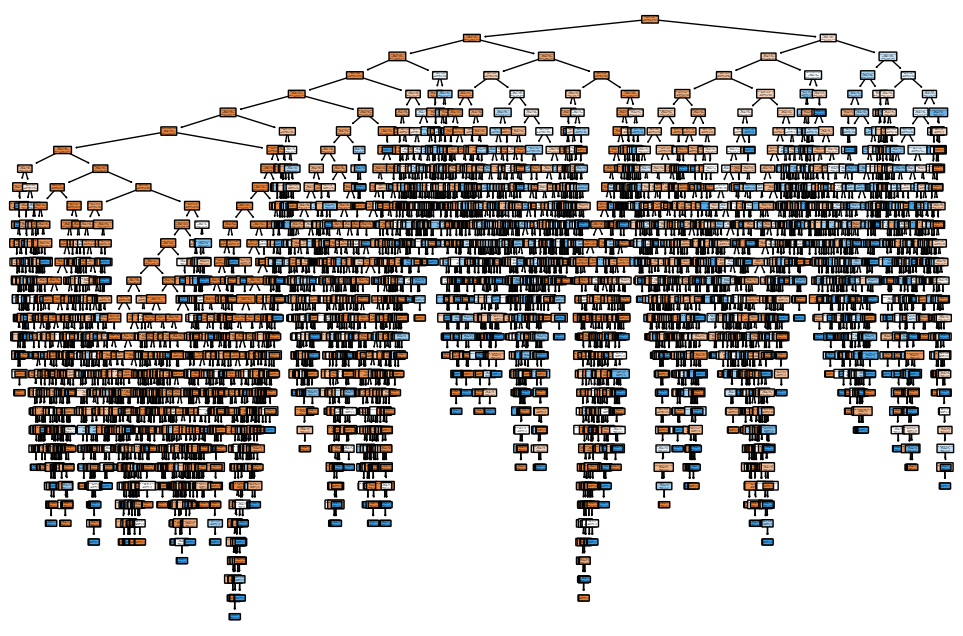

In [272]:
# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

In [273]:
# Decision Tree with Pruning
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=50)  # Adjust parameters
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))


Decision Tree Results:
Accuracy: 0.893158930431763
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      7658
        True       0.54      0.38      0.45       981

    accuracy                           0.89      8639
   macro avg       0.73      0.67      0.69      8639
weighted avg       0.88      0.89      0.88      8639

[[7340  318]
 [ 605  376]]


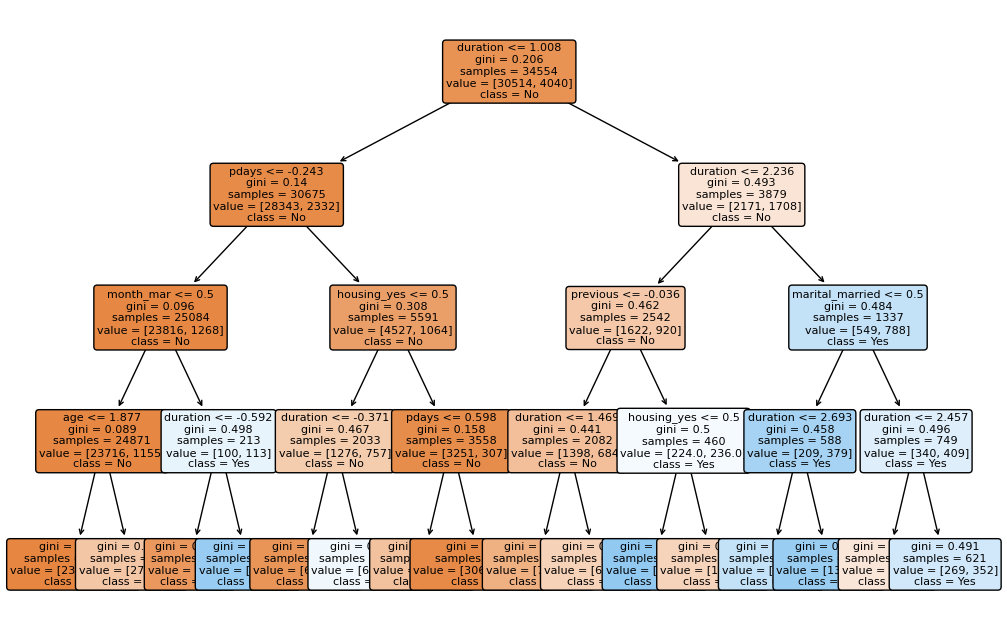

In [274]:
# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['No', 'Yes'], 
          filled=True, rounded=True, fontsize=8)  # Adjust fontsize
plt.show()

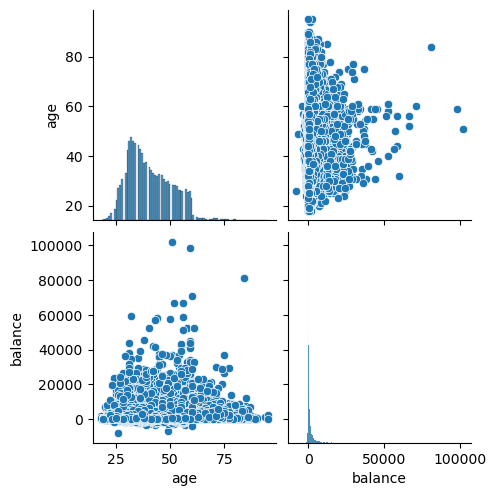

In [275]:
# Plot Numberical variables
sns.pairplot(data[['age', 'balance']]) 
plt.show()

<Figure size 1200x800 with 0 Axes>

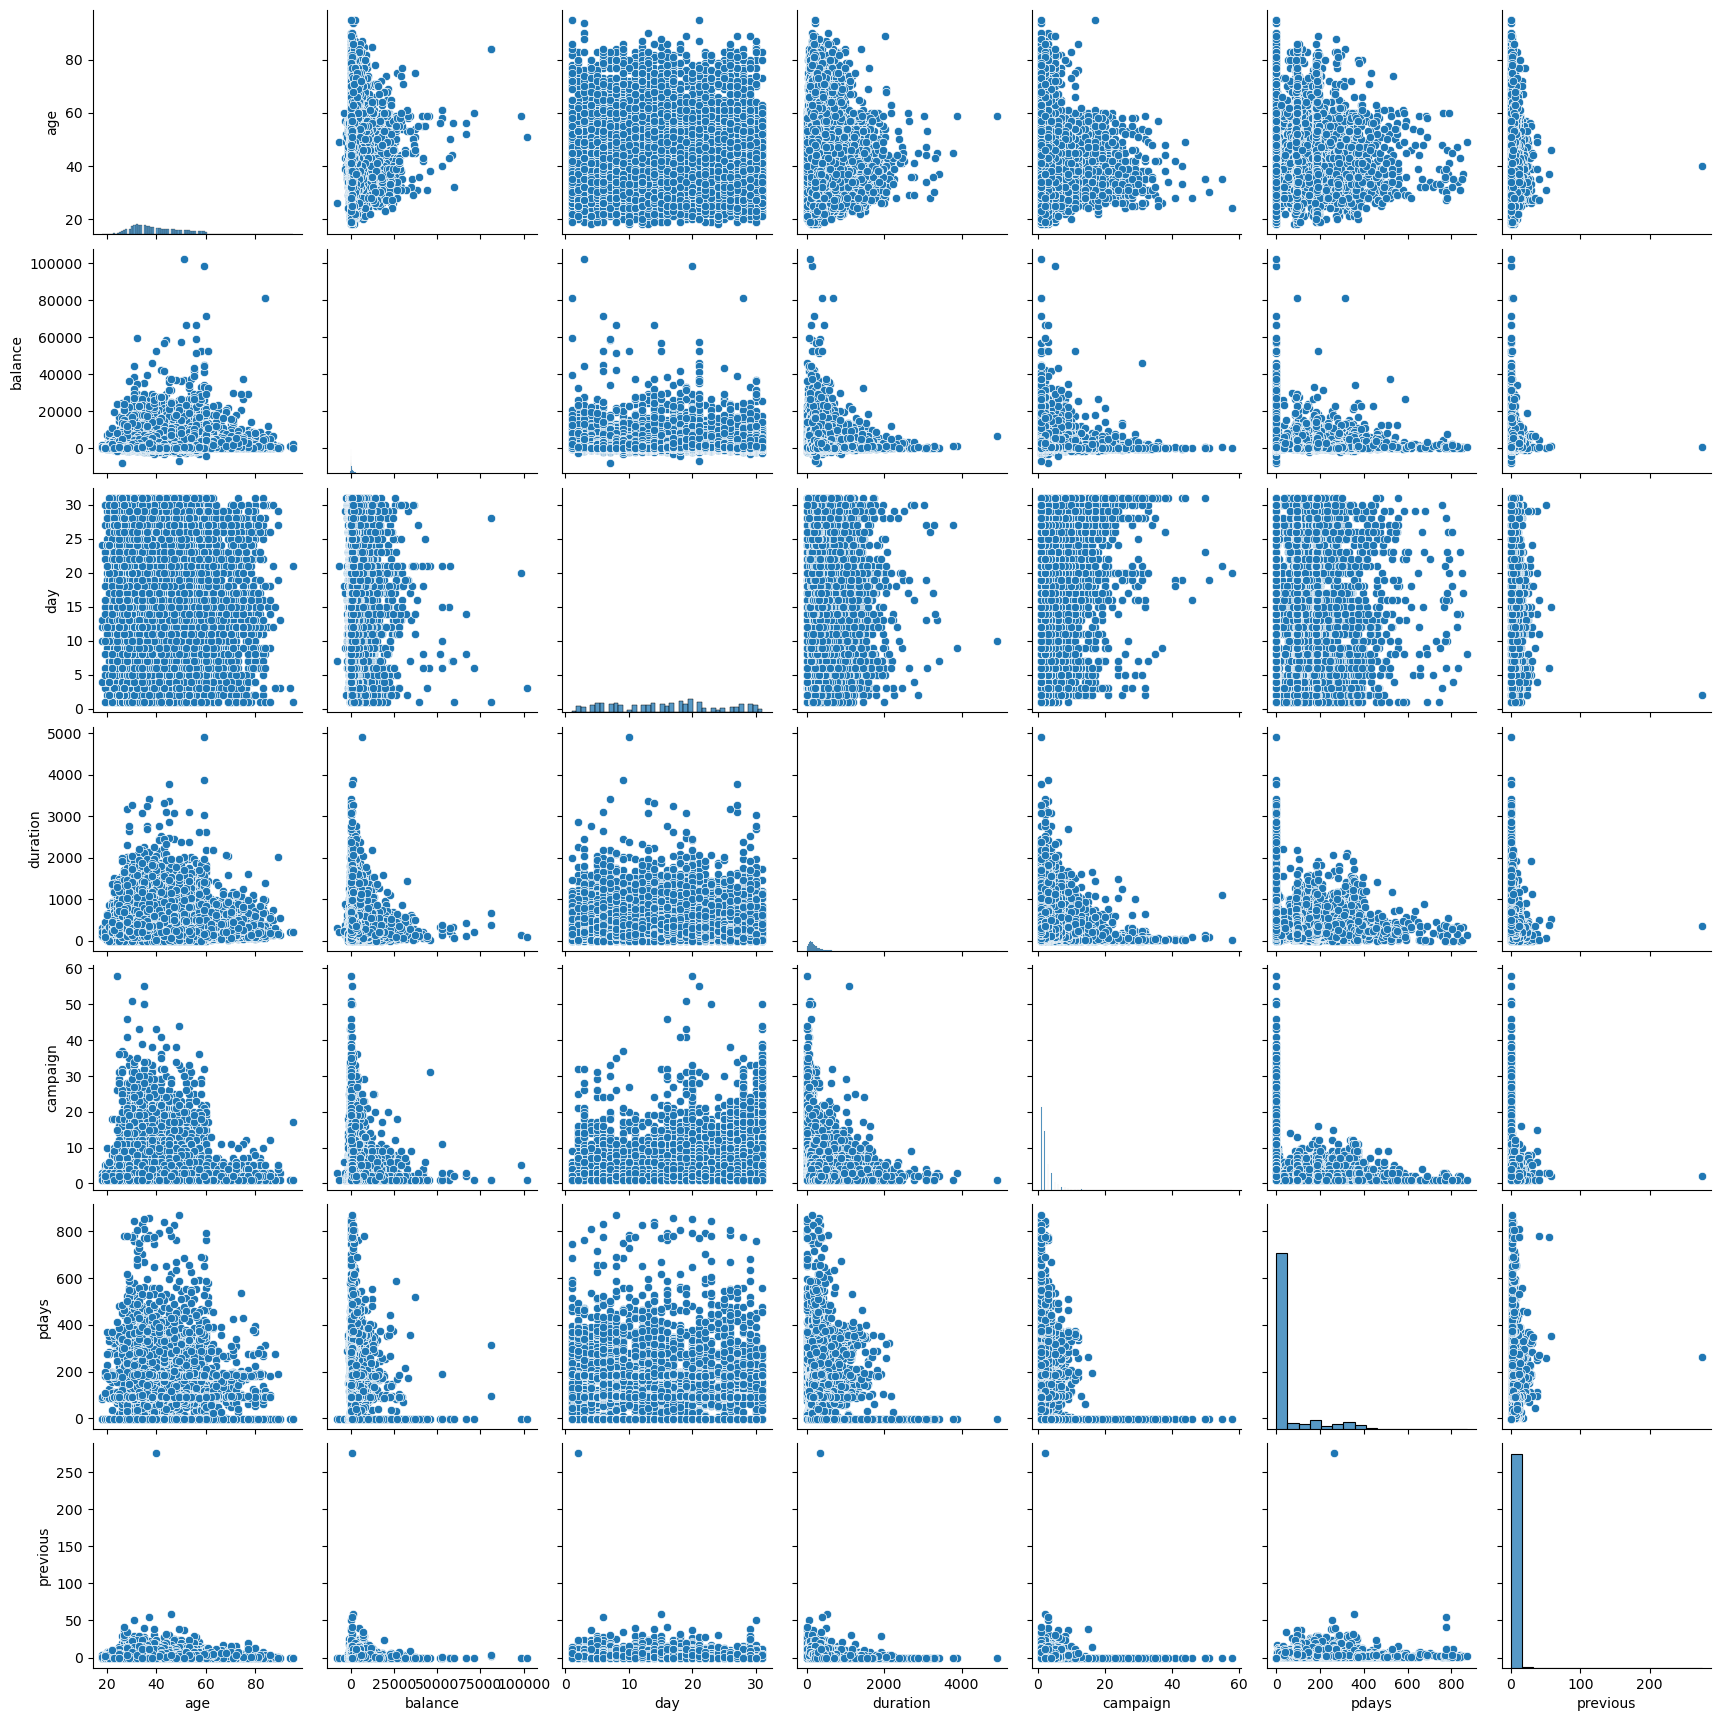

In [276]:
# Plot all Numerical variables
plt.figure(figsize=(12, 8))
sns.pairplot(data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']])
plt.show()